In [123]:
import numpy as np
import librosa 
import matplotlib.pyplot as plt
%matplotlib inline


def _diff(x1,x2):
    return np.sum((x1-x2)**2)
def _autocorr(x1,x2):
    return np.sum(x1*x2)

def yin(x,step=3):
    """
    x: signal to be treated

    returns: Autocorrelation function of x
                At time t with lag 'lag'
    
    """
    if step == 1:
        func = _autocorr
    else:
        func = _diff

    W = x.shape[0]//2
    min_lag = 0
    lags = range(min_lag,W)
    
    result = np.zeros(x.shape[0]//2)
    if step >= 3:
        acc_norm = 1e-8
    for lag in lags:
        x1 = x[0:W]
        x2 = x[lag:lag+W]
        result[lag] = func(x1,x2)
        
        if step >= 3:
            acc_norm += result[lag]
            if lag == 0:
                result[lag] = 1
            else:
                norm = acc_norm/lag
                result[lag] /= norm
    
    if step == 1:
        f0 = np.argmax(result)
    else:
        f0 = np.argmin(result)
    return result,f0



In [111]:
wave,sr = librosa.load('flute-a4.wav',sr=None)

In [125]:
frame = wave[2048:2048+2048]
print(sr)
a,f0 = yin(frame,step=3)
b,f02 = yin(frame,step=1)
print(f0,f02)

44100
(100, 1004)


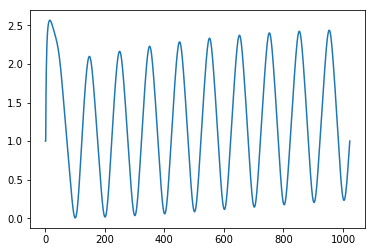

In [127]:
plt.plot(a)
#plt.plot(b)